In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sample_dataset.csv')
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.1328,0.1980,NaN,0.1809,NaN,...,16.67,152.2,1575.0,0.1374,NaN,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                  object
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
df.shape

(569, 31)

In [4]:
df['area error']

0        A
1        A
2        A
3        A
4      NaN
      ... 
564      A
565      A
566      A
567      A
568      A
Name: area error, Length: 569, dtype: object

In [5]:
df['area error'].unique()

array(['A', nan, 'B', 'C'], dtype=object)

In [10]:
df.shape

(569, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              482 non-null    float64
 1   mean texture             492 non-null    float64
 2   mean perimeter           513 non-null    float64
 3   mean area                403 non-null    float64
 4   mean smoothness          384 non-null    float64
 5   mean compactness         480 non-null    float64
 6   mean concavity           439 non-null    float64
 7   mean concave points      382 non-null    float64
 8   mean symmetry            471 non-null    float64
 9   mean fractal dimension   504 non-null    float64
 10  radius error             475 non-null    float64
 11  texture error            434 non-null    float64
 12  perimeter error          381 non-null    float64
 13  area error               494 non-null    object 
 14  smoothness error         4

In [12]:
df.isna()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
566,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

mean radius                 87
mean texture                77
mean perimeter              56
mean area                  166
mean smoothness            185
mean compactness            89
mean concavity             130
mean concave points        187
mean symmetry               98
mean fractal dimension      65
radius error                94
texture error              135
perimeter error            188
area error                  75
smoothness error            77
compactness error          113
concavity error            190
concave points error        62
symmetry error              82
fractal dimension error    157
worst radius                94
worst texture              155
worst perimeter            109
worst area                  57
worst smoothness           101
worst compactness           95
worst concavity             62
worst concave points        74
worst symmetry             159
worst fractal dimension     99
target                       0
dtype: int64

In [14]:
df.isna().sum()/df.shape[0]

mean radius                0.152900
mean texture               0.135325
mean perimeter             0.098418
mean area                  0.291740
mean smoothness            0.325132
mean compactness           0.156415
mean concavity             0.228471
mean concave points        0.328647
mean symmetry              0.172232
mean fractal dimension     0.114236
radius error               0.165202
texture error              0.237258
perimeter error            0.330404
area error                 0.131810
smoothness error           0.135325
compactness error          0.198594
concavity error            0.333919
concave points error       0.108963
symmetry error             0.144112
fractal dimension error    0.275923
worst radius               0.165202
worst texture              0.272408
worst perimeter            0.191564
worst area                 0.100176
worst smoothness           0.177504
worst compactness          0.166960
worst concavity            0.108963
worst concave points       0

In [19]:
(df.isna().sum()/df.shape[0]).sort_values()

target                     0.000000
mean perimeter             0.098418
worst area                 0.100176
worst concavity            0.108963
concave points error       0.108963
mean fractal dimension     0.114236
worst concave points       0.130053
area error                 0.131810
mean texture               0.135325
smoothness error           0.135325
symmetry error             0.144112
mean radius                0.152900
mean compactness           0.156415
radius error               0.165202
worst radius               0.165202
worst compactness          0.166960
mean symmetry              0.172232
worst fractal dimension    0.173989
worst smoothness           0.177504
worst perimeter            0.191564
compactness error          0.198594
mean concavity             0.228471
texture error              0.237258
worst texture              0.272408
fractal dimension error    0.275923
worst symmetry             0.279438
mean area                  0.291740
mean smoothness            0

<AxesSubplot:>

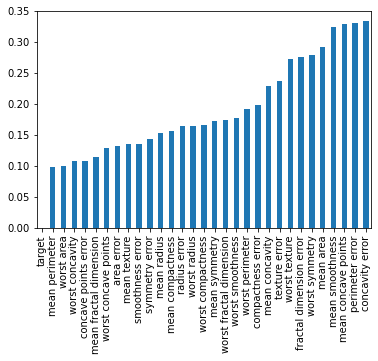

In [20]:
(df.isna().sum()/df.shape[0]).sort_values().plot(kind = 'bar')

In [21]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,482.000000,492.000000,513.000000,403.000000,384.000000,480.000000,439.000000,382.000000,471.000000,504.000000,...,414.000000,460.000000,512.000000,468.000000,474.000000,507.000000,495.000000,410.000000,470.000000,569.000000
mean,14.059548,19.311829,92.039025,661.522581,0.097156,0.104531,0.094063,0.049115,0.181405,0.062626,...,25.599058,107.322848,893.873828,0.133065,0.256748,0.267936,0.116579,0.291797,0.084363,0.627417
std,3.501791,4.347769,24.028669,356.669534,0.014502,0.053335,0.083301,0.038449,0.027633,0.007102,...,6.186596,33.967766,587.297571,0.023000,0.160373,0.209779,0.066426,0.066327,0.018683,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
25%,11.672500,16.170000,75.270000,428.100000,0.086688,0.064815,0.030410,0.020682,0.161950,0.057530,...,20.842500,84.147500,510.275000,0.117175,0.144500,0.106450,0.065280,0.248725,0.071857,0.000000
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,...,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,15.745000,21.802500,104.700000,796.000000,0.106825,0.130325,0.135100,0.074122,0.196600,0.066003,...,29.485000,126.950000,1141.000000,0.147125,0.343800,0.384100,0.165650,0.319750,0.092172,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [26]:
df.describe(percentiles=[0.25, 0.95, 0.75])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,482.000000,492.000000,513.000000,403.000000,384.000000,480.000000,439.000000,382.000000,471.000000,504.000000,...,414.000000,460.000000,512.000000,468.000000,474.000000,507.000000,495.000000,410.000000,470.000000,569.000000
mean,14.059548,19.311829,92.039025,661.522581,0.097156,0.104531,0.094063,0.049115,0.181405,0.062626,...,25.599058,107.322848,893.873828,0.133065,0.256748,0.267936,0.116579,0.291797,0.084363,0.627417
std,3.501791,4.347769,24.028669,356.669534,0.014502,0.053335,0.083301,0.038449,0.027633,0.007102,...,6.186596,33.967766,587.297571,0.023000,0.160373,0.209779,0.066426,0.066327,0.018683,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
25%,11.672500,16.170000,75.270000,428.100000,0.086688,0.064815,0.030410,0.020682,0.161950,0.057530,...,20.842500,84.147500,510.275000,0.117175,0.144500,0.106450,0.065280,0.248725,0.071857,0.000000
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,...,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,15.745000,21.802500,104.700000,796.000000,0.106825,0.130325,0.135100,0.074122,0.196600,0.066003,...,29.485000,126.950000,1141.000000,0.147125,0.343800,0.384100,0.165650,0.319750,0.092172,1.000000
95%,20.569000,27.700000,135.780000,1307.100000,0.121755,0.210745,0.255150,0.120275,0.234550,0.076020,...,36.094500,171.145000,2020.350000,0.171910,0.574745,0.678210,0.240170,0.412880,0.120455,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [27]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.20980,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.1980,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.13740,NaN,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.2439,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.1922,0.3215,0.1628,0.2572,NaN,0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,NaN,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,NaN,...,NaN,184.60,1821.0,0.16500,0.8681,0.9387,0.2650,0.4087,0.12400,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              482 non-null    float64
 1   mean texture             492 non-null    float64
 2   mean perimeter           513 non-null    float64
 3   mean area                403 non-null    float64
 4   mean smoothness          384 non-null    float64
 5   mean compactness         480 non-null    float64
 6   mean concavity           439 non-null    float64
 7   mean concave points      382 non-null    float64
 8   mean symmetry            471 non-null    float64
 9   mean fractal dimension   504 non-null    float64
 10  radius error             475 non-null    float64
 11  texture error            434 non-null    float64
 12  perimeter error          381 non-null    float64
 13  area error               494 non-null    object 
 14  smoothness error         4

In [35]:
df.describe(include=['object'])

,area error
count,494
unique,3
top,A
freq,489


<AxesSubplot:>

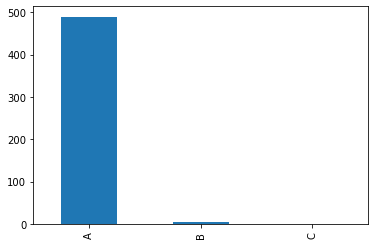

In [36]:
df['area error'].value_counts().plot(kind ="bar")

In [31]:
df.describe(include=['object'])

In [30]:
df['area error'].value_counts()

A    489
B      4
C      1
Name: area error, dtype: int64

In [32]:
# Visualisation Aspect

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>],
       [<AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>]], dtype=object)

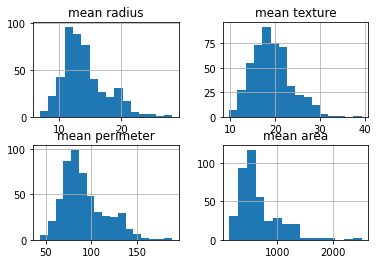

In [34]:
df.iloc[:,0:4].hist(bins = "rice")

In [38]:
# moving to BoxPlot

In [39]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [40]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.20980,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.1980,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.13740,NaN,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.2439,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.1922,0.3215,0.1628,0.2572,NaN,0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,NaN,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,NaN,...,NaN,184.60,1821.0,0.16500,0.8681,0.9387,0.2650,0.4087,0.12400,0
